stationary test

stationary time series data donot dependent on time. Time series are stationary if they donot have trend or seasonal effects. 
When a time series is stationary , it can be easier to model .

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Before difference mean and Variance

mean1 = 21.341960 ,mean2 = 75.505616
var1 = 49.661021 ,var2 = 643.041750


<AxesSubplot:title={'center':'histogram of time series data'}, xlabel='Price', ylabel='Density'>

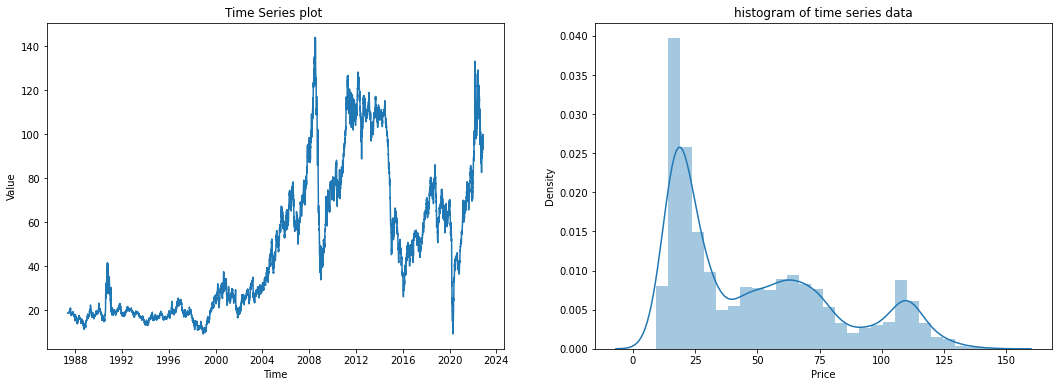

In [5]:
# Time series stationary check
df = pd.read_csv("../data/BrentOilPrices.csv")
df['Date'] = pd.to_datetime(df.Date) # change datatype object to datetime
df.set_index('Date',inplace = True)  # set index as datetime
#taking half length of data
split = round(len(df['Price'])/2)
# split two part of time series data 
X1,X2 = df['Price'][0:split],df['Price'][split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()
# print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\nBefore difference mean and Variance\n")
print("mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))
fig, ax = plt.subplots(1,2,figsize = (18,6))
plt.title("histogram of time series data")
ax[0].plot(df['Price'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot ")
sns.distplot(df['Price'], ax =ax[1])

## First differencing


After first difference

mean1 = 0.005669 ,mean2 = 0.010970
var1 = 0.320668 ,var2 = 2.638063


<AxesSubplot:title={'center':'histogram of time series data after first difference '}, xlabel='first_diff', ylabel='Density'>

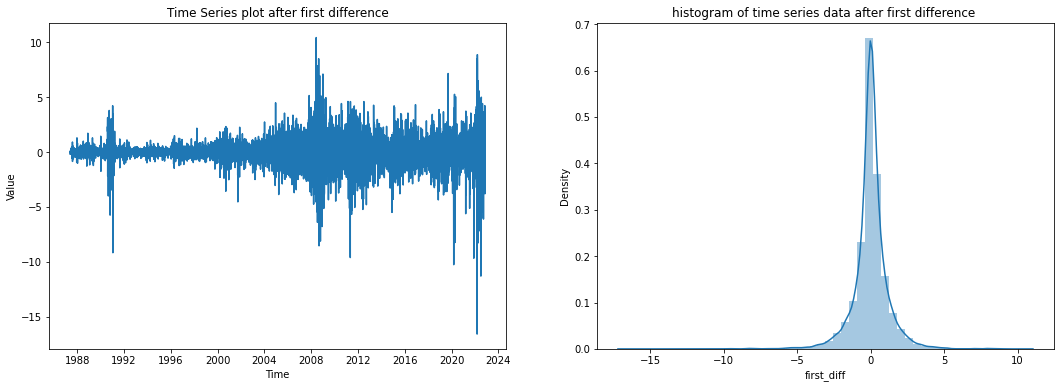

In [6]:
# Time series data after first difference 
df['first_diff'] = df.diff()
df.dropna(inplace = True)
#taking half length of data
split = round(len(df['first_diff'])/2)
# split two part of time series data 
X1,X2 = df['first_diff'][0:split],df['first_diff'][split:]
mean1 ,mean2 = X1.mean() , X2.mean()
var1,var2 = X1.var() , X2.var()
# print("\033[1m" + "\nTo check Stationary \n" +  "\033[0m")
print("\nAfter first difference\n")
print(f"mean1 = %f ,mean2 = %f" %(mean1,mean2))
print("var1 = %f ,var2 = %f" %(var1,var2))
fig ,ax = plt.subplots(1,2,figsize = (18,6))
plt.title("histogram of time series data after first difference ")
ax[0].plot(df['first_diff'])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].set_title("Time Series plot after first difference")
sns.distplot(df['first_diff'],ax =ax[1])

## ADF test

In [7]:
# ADF Test before differencing

from statsmodels.tsa.stattools import adfuller 
df_resample = df.resample('M').sum()
adf = adfuller(df_resample['Price'], 12)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value (0.05): " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")


Statistics analysis

Statistic Test :  -2.1397993165526015
p-value :  0.22881503298202444
# n_lags :  12
No of observation:  414
 critical value 1% : -3.4462444670071046
 critical value 5% : -2.8685466682709975
 critical value 10% : -2.5705023309762187


In [8]:
# ADF Test after differencing

from statsmodels.tsa.stattools import adfuller 
df_resample = df.resample('M').sum()
df_resample['first_diffprice'] = df_resample['Price'].diff() # first difference 
df_resample.dropna(inplace =True)
adf = adfuller(df_resample['first_diffprice'],12)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")


Statistics analysis

Statistic Test :  -6.503448325882953
p-value :  1.1465922904336549e-08
# n_lags :  12
No of observation:  413
 critical value 1% : -3.4462831955497135
 critical value 5% : -2.8685636962704395
 critical value 10% : -2.5705114078759914


## Resources

* https://otexts.com/fpp2/stationarity.html